# Libraries and Settings

In [5]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/stud/Documents/Dokumente – MacBook Pro von Abedin/ZHAW/KI/flask_quickstart


# Data Import

In [6]:
import numpy as np
# Read and select variables
df_orig = pd.read_csv("bfs_municipality_and_tax_data.csv", sep=",", encoding='utf-8')

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
z_scores = np.abs((df['pop'] - df['pop'].mean()) / df['pop'].std())

# Definieren eines Schwellenwerts für den Z-Score
threshold = 3

# Filtern der Datenpunkte, die den Schwellenwert überschreiten
filtered_df = df[z_scores <= threshold]


print(df.shape)
df.head(5)

(2059, 7)


,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income
0,1,Aeugst am Albis,1981,250.442478,14.184755,442.0,108'788
1,2,Affoltern am Albis,12303,1161.756374,28.700317,6920.0,72'583
2,3,Bonstetten,5572,749.932705,16.564968,1014.0,91'002
3,4,Hausen am Albis,3751,275.808824,16.022394,1021.0,91'766
4,5,Hedingen,3778,578.560490,16.410799,1478.0,94'456


In [7]:
len(df)

2059

In [8]:
df.columns

Index(['bfs_number', 'bfs_name', 'pop', 'pop_dens', 'frg_pct', 'emp',
       'tax_income'],
      dtype='object')

# Transformieren der Daten

In [9]:
# Import der notwendigen Bibliothek
import pandas as pd

# Pfad zur CSV-Datei
data_path = 'bfs_municipality_and_tax_data.csv'

# Laden der Daten
data_frame = pd.read_csv(data_path)

# Bereinigen und Konvertieren der 'tax_income' Spalte
data_frame['tax_income'] = data_frame['tax_income'].replace("'", "", regex=True).astype(int)

# Erste Zeilen der Daten anzeigen, um die Umwandlung zu überprüfen
print(data_frame.head())


   bfs_number            bfs_name    pop     pop_dens    frg_pct     emp  \
0           1     Aeugst am Albis   1981   250.442478  14.184755   442.0   
1           2  Affoltern am Albis  12303  1161.756374  28.700317  6920.0   
2           3          Bonstetten   5572   749.932705  16.564968  1014.0   
3           4     Hausen am Albis   3751   275.808824  16.022394  1021.0   
4           5            Hedingen   3778   578.560490  16.410799  1478.0   

   tax_income  
0      108788  
1       72583  
2       91002  
3       91766  
4       94456  


In [10]:
# Spalten für die Merkmale auswählen, 'tax_income' wird nicht in X_train inkludiert
features = ['pop', 'pop_dens']
target = 'tax_income'

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(data_frame[features], data_frame[target], test_size=0.20, random_state=42)


In [11]:
# Erstellen und Trainieren des linearen Modells
linear_model = LinearRegression()

# Kreuzvalidierung des Modells
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Ausgabe des Modells und der Validierungsergebnisse
print(f'--{linear_model}--')
print(cv_scores)
print(np.mean(cv_scores))


--LinearRegression()--
[-5.11184266e+08 -9.97282727e+08 -8.18170502e+08 -5.96178621e+08
 -7.58082729e+08]
-736179768.951327


In [12]:
# Pipeline für das polynomiale Modell erstellen
polynomial_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2)),
    ("linear_regression", LinearRegression()),
])

# Kreuzvalidierung des polynomialen Modells durchführen
poly_scores = cross_val_score(polynomial_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)

# Ergebnisse der Kreuzvalidierung ausgeben
print(f'--{polynomial_model}--')
print(poly_scores)
print(np.mean(poly_scores))


--Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])--
[-21541.25033262 -30915.50924036 -28060.93191501 -36922.53912147
 -26578.83220757]
-28803.812563406223


In [13]:
# Erstellen eines RandomForest-Regressionsmodells
randomforest_model = RandomForestRegressor(random_state=42)

# Kreuzvalidierung des RandomForest-Modells durchführen
rf_scores = cross_val_score(randomforest_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)

# Ergebnisse der Kreuzvalidierung ausgeben
print(f'--{randomforest_model}--')
print(rf_scores)
print(np.mean(rf_scores))


--RandomForestRegressor(random_state=42)--
[-24694.8440253  -28366.49948419 -29378.19450515 -25096.26590966
 -27832.84598362]
-27073.729981585017


# GridSearch CV

In [14]:
# Abrufen der möglichen Konfigurationen des linearen Modells
model_parameters = linear_model.get_params()
print("Verfügbare Parameter des linearen Modells:", model_parameters)


Verfügbare Parameter des linearen Modells: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [15]:
# Abrufen der möglichen Konfigurationen des polynomialen Modells
poly_model_parameters = polynomial_model.get_params()
print("Verfügbare Parameter des polynomialen Modells:", poly_model_parameters)


Verfügbare Parameter des polynomialen Modells: {'memory': None, 'steps': [('polynomial_features', PolynomialFeatures()), ('linear_regression', LinearRegression())], 'verbose': False, 'polynomial_features': PolynomialFeatures(), 'linear_regression': LinearRegression(), 'polynomial_features__degree': 2, 'polynomial_features__include_bias': True, 'polynomial_features__interaction_only': False, 'polynomial_features__order': 'C', 'linear_regression__copy_X': True, 'linear_regression__fit_intercept': True, 'linear_regression__n_jobs': None, 'linear_regression__positive': False}


In [16]:
# Import der notwendigen Bibliothek für die Modelloptimierung
from sklearn.model_selection import GridSearchCV

# Konfigurationsgitter für das polynomiale Modell
param_grid = {
    'polynomial_features__degree': [2, 4],  # Mögliche Grade des Polynoms
    'polynomial_features__include_bias': [True, False],  # Entscheidung, ob ein Bias-Term einbezogen werden soll
}

# Durchführung der Grid-Suche mit Kreuzvalidierung
grid_search_pl = GridSearchCV(polynomial_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_search_pl.fit(X_train, y_train)

# Ausgabe der besten Modellkonfiguration und der dazugehörigen Ergebnisse
print("Bestes Modell:", grid_search_pl.best_estimator_)
print("Beste Parameter:", grid_search_pl.best_params_)
print("Beste Kreuzvalidierungsergebnis:", grid_search_pl.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=True; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=2, polynomial_features__include_bias=False; total time=   0.0s
[CV] END polynomial_features__degree=2, polyn

In [17]:
# Konfigurationsgitter für das RandomForest-Modell definieren
param_grid_rf = {
    'max_depth': [90, 100, 110],  # Mögliche maximale Tiefen
    'max_features': [6, 9]        # Mögliche Anzahl an Features
}

# Grid-Suche für das RandomForest-Modell mit spezifischer Verbose-Einstellung für den Fortschritt
grid_search_rf = GridSearchCV(randomforest_model, param_grid_rf, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_search_rf.fit(X_train, y_train)

# Ergebnisse der Grid-Suche ausgeben
print("Bestes Modell:", grid_search_rf.best_estimator_)
print("Beste Parameter:", grid_search_rf.best_params_)
print("Beste Kreuzvalidierungsergebnis:", grid_search_rf.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................max_depth=90, max_features=6; total time=   0.3s
[CV] END .......................max_depth=90, max_features=6; total time=   0.3s
[CV] END .......................max_depth=90, max_features=6; total time=   0.3s
[CV] END .......................max_depth=90, max_features=6; total time=   0.3s
[CV] END .......................max_depth=90, max_features=6; total time=   0.3s
[CV] END .......................max_depth=90, max_features=9; total time=   0.3s
[CV] END .......................max_depth=90, max_features=9; total time=   0.3s
[CV] END .......................max_depth=90, max_features=9; total time=   0.3s
[CV] END .......................max_depth=90, max_features=9; total time=   0.3s
[CV] END .......................max_depth=90, max_features=9; total time=   0.3s
[CV] END ......................max_depth=100, max_features=6; total time=   0.3s
[CV] END ......................max_depth=100, max

# Datenanalyse

       pop    pop_dens      abs_error
1797  2118  613.913043  359738.274123
2058  2387  616.795866  347598.123991
597   5350  305.714286  230989.434725
2098  2577  583.031674  184994.206152
699    398  222.346369  183496.358237


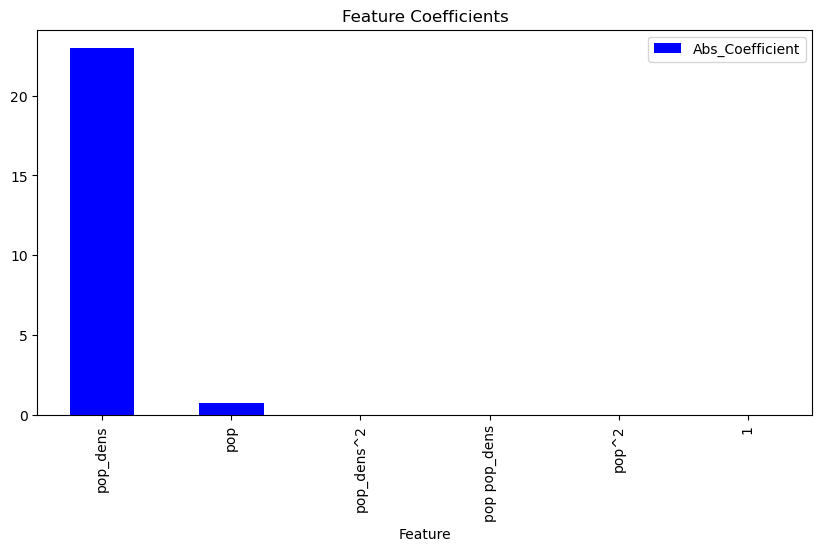

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits die Daten geladen und X_train, y_train definiert

# Polynomial Model definieren
polynomial_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2)),
    ("linear_regression", LinearRegression())
])

# Modell mit Trainingsdaten trainieren
polynomial_model.fit(X_train, y_train)

# Vorhersagen mit dem Modell machen
y_pred = polynomial_model.predict(X_train)

# Fehler berechnen
errors = y_train - y_pred
abs_errors = np.abs(errors)

# Fehlerdaten zu Trainingsdaten hinzufügen
df_train = pd.DataFrame(X_train, columns=['pop', 'pop_dens'])  # Achten Sie darauf, die korrekten Spaltennamen zu verwenden
df_train['abs_error'] = abs_errors

# Daten nach dem Fehler sortieren und anzeigen
df_train_sorted = df_train.sort_values(by='abs_error', ascending=False)
print(df_train_sorted.head())

# Koeffizienten extrahieren und darstellen, wenn das Modell eine Pipeline ist und die lineare Regression enthält
if 'linear_regression' in polynomial_model.named_steps:
    coefficients = polynomial_model.named_steps['linear_regression'].coef_
    feature_names = polynomial_model.named_steps['polynomial_features'].get_feature_names_out()

    df_coeffs = pd.DataFrame({
        'Feature': feature_names, 
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    })
    df_coeffs.sort_values('Abs_Coefficient', ascending=False, inplace=True)

    # Visualisierung der Koeffizienten
    df_coeffs.plot(kind='bar', x='Feature', y='Abs_Coefficient', color='blue', figsize=(10, 5))
    plt.title('Feature Coefficients')
    plt.show()


In [20]:
X_train.columns

Index(['pop', 'pop_dens'], dtype='object')

In [21]:
print(df.columns)


Index(['bfs_number', 'bfs_name', 'pop', 'pop_dens', 'frg_pct', 'emp',
       'tax_income'],
      dtype='object')


In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Definieren des polynomialen Modells
polynomial_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2)),
    ("linear_regression", LinearRegression())
])

# Modell trainieren
polynomial_model.fit(X_train, y_train)

# Holen aller Vorhersagen für den Trainingssatz mittels Kreuzvalidierung
y_train_predict = cross_val_predict(polynomial_model, X_train, y_train, cv=5)

# DataFrame zur Analyse erstellen
df_new = pd.DataFrame(X_train, columns=X_train.columns, copy=True)
df_new['error'] = np.abs(y_train_predict - y_train)
df_new['price'] = y_train
df_new['predicted_price'] = y_train_predict

# Ergebnisse anzeigen
print("Datensatzgröße:", df_new.shape)
df_new.head()


Datensatzgröße: (1724, 5)


,pop,pop_dens,error,price,predicted_price
867,5140,368.723099,1954.699260,76335,74380.300740
1606,434,19.727273,9613.355640,60849,70462.355640
1111,1120,24.190065,18203.403546,51836,70039.403546
1258,1469,327.171492,9547.985444,85695,76147.014556
1319,1042,109.568875,5081.069339,66865,71946.069339


Statistische Zusammenfassung der Fehler:
count      1724.000000
mean      14939.597365
std       25152.444228
min          32.041986
25%        4555.686264
50%        9775.227734
75%       16571.647858
max      398890.610833
Name: error, dtype: float64


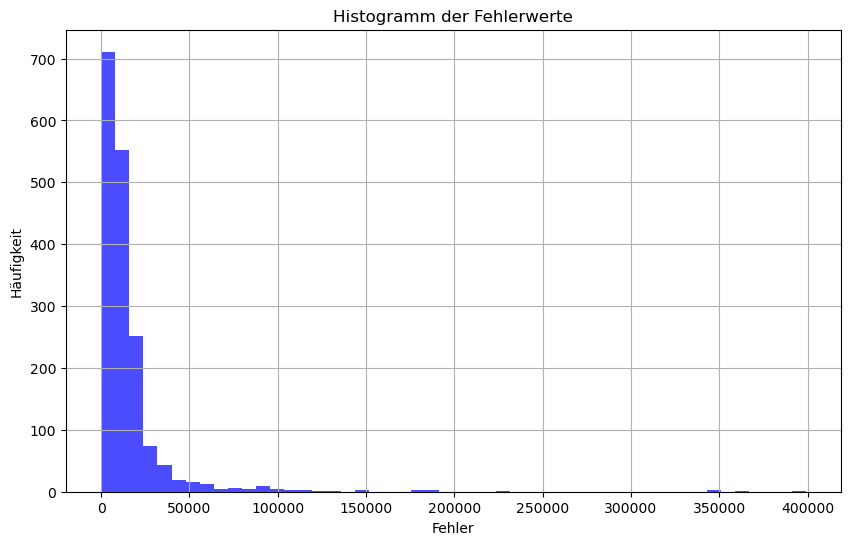

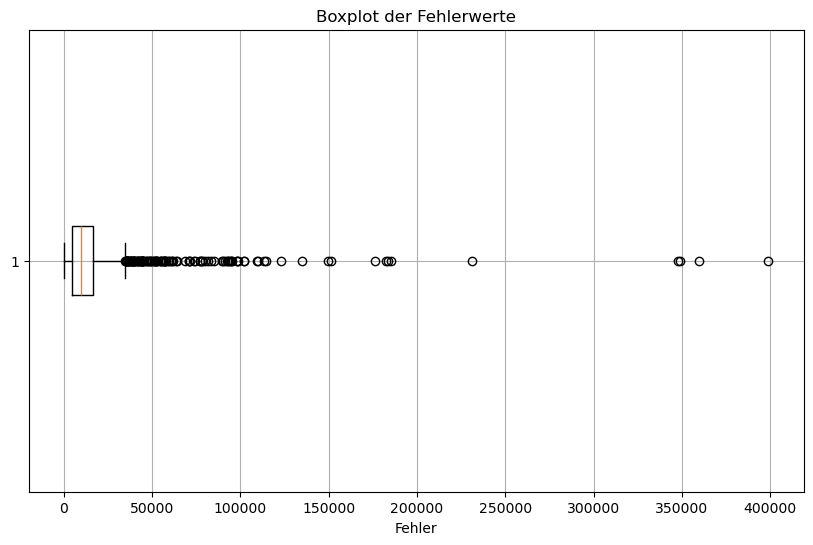

In [24]:
import matplotlib.pyplot as plt

# Statistische Zusammenfassung der Fehler
print("Statistische Zusammenfassung der Fehler:")
print(df_new['error'].describe())

# Histogramm der Fehler erstellen
plt.figure(figsize=(10, 6))
plt.hist(df_new['error'], bins=50, color='blue', alpha=0.7)
plt.title('Histogramm der Fehlerwerte')
plt.xlabel('Fehler')
plt.ylabel('Häufigkeit')
plt.grid(True)  # Gitter hinzufügen für bessere Lesbarkeit
plt.show()

# Boxplot der Fehler erstellen
plt.figure(figsize=(10, 6))
plt.boxplot(df_new['error'], vert=False)
plt.title('Boxplot der Fehlerwerte')
plt.xlabel('Fehler')
plt.grid(True)  # Gitter hinzufügen für bessere Lesbarkeit
plt.show()


In [25]:
# Filtern der Daten basierend auf einem Fehler größer als 25,000
filtered_data = df_new[df_new['error'] > 25000]

# Speichern der gefilterten Daten in einer CSV-Datei
filtered_data.to_csv('data_with_large_errors.csv', sep=",", encoding='utf-8', index=False)


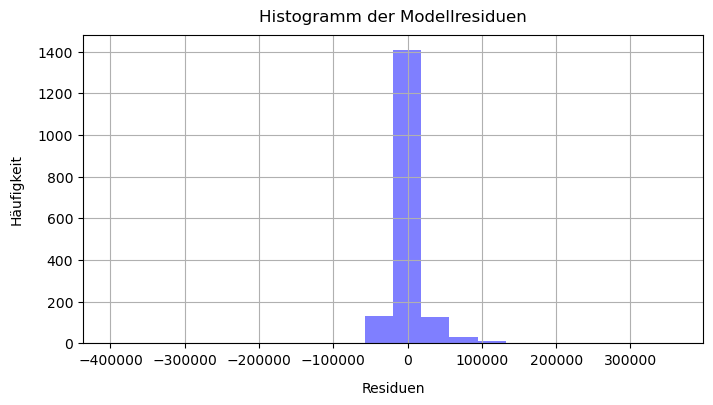

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Definieren des polynomialen Modells
polynomial_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2)),
    ("linear_regression", LinearRegression())
])

# Holen aller Vorhersagen für den Trainingssatz mittels Cross-Validation
y_train_predict = cross_val_predict(polynomial_model, X_train, y_train, cv=5)

# Berechnen der Residuen
y_residuals = y_train - y_train_predict

# Histogramm der Residuen erstellen
plt.figure(figsize=(8, 4))
n, bins, patches = plt.hist(y_residuals, bins=20, color='blue', alpha=0.5)

# Beschriftungen setzen
plt.xlabel('Residuen', fontsize=10, labelpad=10)
plt.ylabel('Häufigkeit', fontsize=10, labelpad=10)
plt.title('Histogramm der Modellresiduen', fontsize=12, pad=10)
plt.grid(True)  # Füge ein Gitter hinzu, um das Ablesen der Werte zu erleichtern
plt.show()


# Modell speichern

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Zuerst sicherstellen, dass alle numerischen Daten korrekt formatiert sind
df['tax_income'] = df['tax_income'].replace("'", "", regex=True).astype(int)

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    df[['pop', 'pop_dens']],  # Feature-Spalten
    df['tax_income'],         # Zielvariable, jetzt ohne Apostrophe
    test_size=0.20,           # Anteil der Testdaten
    random_state=42           # Zufallszahlengenerator für reproduzierbare Ergebnisse
)

# Definieren des polynomialen Modells
polynomial_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2)),
    ("linear_regression", LinearRegression())
])

# Trainieren des polynomialen Modells mit den Trainingsdaten
polynomial_model.fit(X_train, y_train)


Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [29]:
import pickle

# Speichern des polynomialen Modells in einer Datei
model_filename = "polynomial_model.pkl"
with open(model_filename, mode="wb") as f:  # Achten auf den korrekten Modus 'wb' für "write binary"
    pickle.dump(polynomial_model, f)  # Angabe von 'f' statt 'file=f' für Klarheit und Konsistenz
